In [1]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['text.usetex'] = True

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

sns.set_style("whitegrid")

In [4]:
class DirPlot(object):
    def __init__(self, dirpath='./'):
        self.dir = dirpath
        self.df_z = {'df': uproot.open('{}/z_jet_files_jets.root'.format(self.dir))['tnjets'].arrays(library='pd'), 'color' : 'red', 'label': 'Z jets'}
        self.df_zmDT = {'df': uproot.open('{}/z_jet_files_jets_mDT0.04.root'.format(self.dir))['tnjets'].arrays(library='pd'), 'color' : 'orange', 'label': 'Z jets mDT'}
        self.df_g = {'df': uproot.open('{}/glue_jet_files_jets.root'.format(self.dir))['tnjets'].arrays(library='pd'), 'color' : 'blue', 'label': 'gluon jets'}
        self.df_q = {'df': uproot.open('{}/quark_jet_files_jets.root'.format(self.dir))['tnjets'].arrays(library='pd'), 'color' : 'green', 'label': 'quark jets'}
        self.ddfs = [self.df_zmDT, self.df_z, self.df_g, self.df_q]
        for i, ddf in enumerate(self.ddfs):
            df = ddf['df']
            ddf['df']['label'] = ddf['label']
            ddf['df_filtered'] = df.loc[(df['pt'] > 500) & (df['pt'] < 550) & (df['tau21']>0)]

        self.dfall = pd.concat([self.ddfs[i]['df_filtered'] for i in range(4)], ignore_index=True)
        # self.dfall.describe(include='all')

    def plot(self, data=None, leg_title=None):
        if data is None:
            data=self.dfall
        _p = sns.displot(data=data, x='tau21', hue='label', kind='hist',  kde=True, stat='density', binwidth=0.02, palette = 'deep')
        plt.legend(prop={'size': 12}, title='')
        if leg_title is None:
            leg_title = self.dir
        _p._legend.set_title(leg_title)
        # https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
        plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
        plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
        plt.ylabel('Density', fontsize=16)
        return _p


No handles with labels found to put in legend.
No handles with labels found to put in legend.


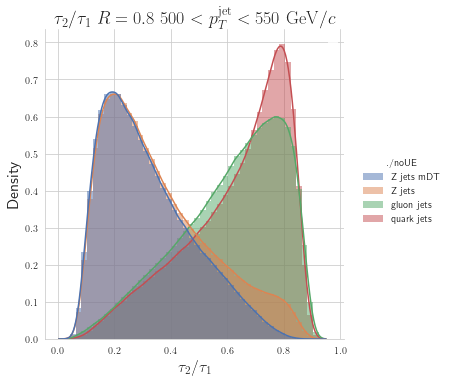

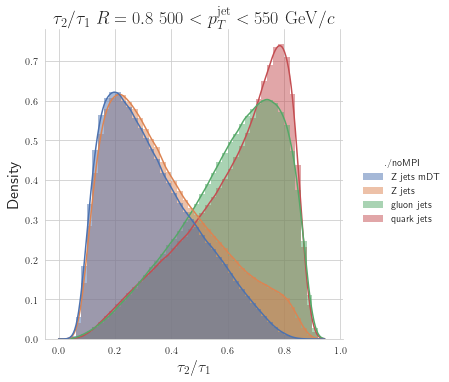

In [5]:
dp_noue = DirPlot('./noUE')
dp_nompi = DirPlot('./noMPI')

_ = dp_noue.plot()
_ = dp_nompi.plot()

In [6]:
class ComparePlot(object):
	def __init__(self, files_labels=[]):
		self.ddfs = []
		for fl in files_labels:
			f = {'df': uproot.open(fl[0])['tnjets'].arrays(library='pd'), 'label': fl[1]}
			self.ddfs.append(f)
		for i, ddf in enumerate(self.ddfs):
			df = ddf['df']
			ddf['df']['label'] = ddf['label']
			ddf['df_filtered'] = df.loc[(df['pt'] > 500) & (df['pt'] < 550) & (df['tau21']>0)]			
		self.dfall = pd.concat([self.ddfs[i]['df_filtered'] for i in range(len(self.ddfs))], ignore_index=True)
		# self.dfall.describe(include='all')

	def plot(self, data=None, leg_title=None, hist=False):
		if data is None:
			data=self.dfall
		if hist:
			_p = sns.displot(data=data, x='tau21', hue='label', kind='hist',  kde=True, stat='density', binwidth=0.02, palette = 'deep')
		else:
			_p = sns.displot(data=data, x='tau21', hue='label', kind='kde', palette = 'deep')
		plt.legend(prop={'size': 12}, title='')
		if leg_title is None:
			leg_title = ''
		_p._legend.set_title(leg_title)
		# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
		plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
		plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
		plt.ylabel('Density', fontsize=16)
		return _p


No handles with labels found to put in legend.


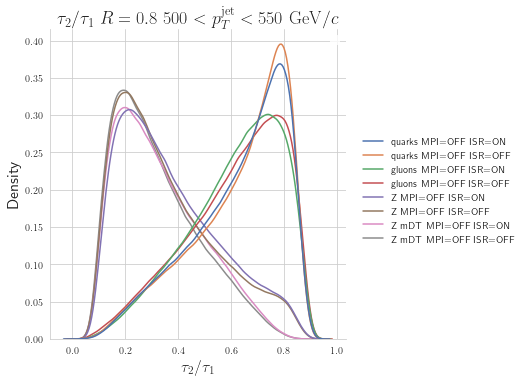

In [7]:
files = [
	['./noMPI/quark_jet_files_jets.root', 		'quarks MPI=OFF ISR=ON'],
	['./noUE/quark_jet_files_jets.root', 		'quarks MPI=OFF ISR=OFF'],

	['./noMPI/glue_jet_files_jets.root', 		'gluons MPI=OFF ISR=ON'],
	['./noUE/glue_jet_files_jets.root', 		'gluons MPI=OFF ISR=OFF'],

	['./noMPI/z_jet_files_jets.root', 			'Z MPI=OFF ISR=ON'],
	['./noUE/z_jet_files_jets.root', 			'Z MPI=OFF ISR=OFF'],

	['./noMPI/z_jet_files_jets_mDT0.04.root', 	'Z mDT MPI=OFF ISR=ON'],
	['./noUE/z_jet_files_jets_mDT0.04.root', 	'Z mDT MPI=OFF ISR=OFF']]

cp = ComparePlot(files_labels=files)
cp.plot()

In [9]:
!ls

compare_tau21.ipynb
delme.py
flavor_tagger.py
gen_ml_sample.sh
gen_ml_sample_zjets.sh
gen_q_g_tag_sample.sh
glue_jet_files_jets.root
glue_jet_files.txt
hardQCD_jets.root
hardQCD.txt
hepmc_jetreco.py
herwig
herwig_jets.root
jet_R_0.4_nperfile_10000_jet_ptmax_550.0_input_nev_10000_list__0.root
jet_R_0.4_nperfile_10000_jet_ptmin_100.0_jet_ptmax_550.0_input_nev_10000_list__0.root
jet_R_0.4_nperfile_10000_jet_ptmin_10.0_jet_ptmax_1000.0_input_nev_10000_list__0.root
jet_R_0.4_nperfile_10000_jet_ptmin_10.0_jet_ptmax_550.0_input_nev_10000_list__0.root
jet_R_0.4_nperfile_10000_jet_ptmin_250.0_jet_ptmax_550.0_input_nev_10000_list__0.root
jet_R_0.4_nperfile_10000_jet_ptmin_500.0_jet_ptmax_550.0_input_nev_10000_list__0.root
jet_R_0.4_nperfile_10000_jet_ptmin_500.0_jet_ptmax_550.0_Zjet_mDT_mDTzcut_0.04_input_nev_10000_list__0.root
jet_R_0.4_nperfile_10000_jet_ptmin_500.0_jet_ptmax_550.0_Zjet_mDTzcut_0.04_input_nev_10000_list__0.root
jet_R_0.8_nperfile_10000_jet_ptmin_400.0_jet_ptmax_550.0_input_nev

No handles with labels found to put in legend.


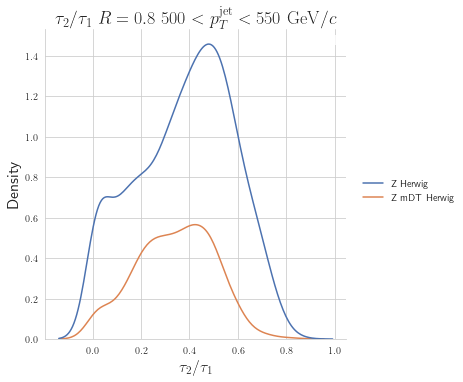

In [11]:
files = [    
    ['./z_jet_files_herwig_jets.root', 	        'Z Herwig'],
    ['./z_jet_files_herwig_jets.root', 	        'Z Herwig'],
	['./z_jet_files_herwig_jets_mDT0.04.root', 	'Z mDT Herwig']]


cp = ComparePlot(files_labels=files)
cp.plot()